# Client

##### import

In [1]:
import socket
import hashlib
import time
import qrcode
import matplotlib.pyplot as plt
from PIL import Image

### App

서버에 연결되었습니다.
Enter your ID: 01012345678

아이디 확인 중 ...
아이디 확인이 완료되었습니다.
Server sent random data (RV): b'\xe1-\xfe|\xf7\xc8\x16\xa2\xd8\x00\x80\xf1\xd0bvC'

지문을 등록하세요.


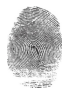

K값: f59ecdf26cb91b476bbc9dde2fe3440ce1368cce0e73320b4066be8378dafff5


In [2]:
# Server address and port
server_address = ('localhost', 12347)

# Connect to the server
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
client_socket.connect(server_address)

# Receive and print the welcome message
welcome_message = client_socket.recv(1024).decode('utf-8')
print(welcome_message)
time.sleep(1)

# Get user's ID and send it to the server
client_id = input("Enter your ID: ")
client_socket.send(client_id.encode('utf-8'))

# Receive and print the ID confirmation message
id_confirmation_message = client_socket.recv(1024).decode('utf-8')
print()
print("아이디 확인 중 ...")
time.sleep(2)
print(id_confirmation_message)
time.sleep(2)

# Receive random data (RV) from the server
RV = client_socket.recv(16)
print("Server sent random data (RV):", RV)
time.sleep(2)

# Read fingerprint from file and calculate its SHA-256 hash
def get_fingerprint():
    # 파일에서 지문값을 읽어온다고 가정
    with open('fingerprint.jpg', 'rb') as file:
        fingerprint_data = file.read()
    return fingerprint_data

# ID와 지문값을 이용 -> K 생성
def generate_K(my_phone_number, fingerprint_data):
    concatenated_data = my_phone_number.encode('utf-8') + fingerprint_data
    K = hashlib.sha256(concatenated_data).hexdigest()
    return K

print()
print("지문을 등록하세요.")
time.sleep(2)
image = Image.open('fingerprint.jpg')
plt.figure(figsize=(1.5, 1.5))
plt.imshow(image)
plt.grid(False)
plt.axis('off')
plt.show()

fingerprint_data=get_fingerprint()
K = generate_K(client_id, fingerprint_data)
time.sleep(1)
print('K값:',K)

### OTP 생성기

In [3]:
# Combine RV and the fingerprint hash for OTP calculation using XOR
otp_combined_data = bytes(x ^ y for x, y in zip(RV, bytes.fromhex(K)))
client_otp = hashlib.sha256(otp_combined_data).hexdigest()
client_socket.send(client_otp.encode('utf-8'))
print("OTP calculated:", client_otp)

# Message loop to keep the connection alive
while True:
    message = input("Enter a message (type 'exit' to close the connection): ")
    client_socket.send(message.encode('utf-8'))

    if message.lower() == 'exit':
        break

    response = client_socket.recv(1024).decode('utf-8')
    print(f"Response from the server: {response}")

# Close the connection
client_socket.close()

OTP calculated: 46766c8fe60a3f40bbec5d1ecfada170fe5560e8964145b188c51041a08dbc83
Enter a message (type 'exit' to close the connection): exit


### App

In [4]:
# OTP에 의해 파생된 안심번호 만들기
def hash_to_number(hash_value):
    # 해시 값을 16진수에서 10진수로 변환
    decimal_number = int(hash_value, 16)
    return decimal_number

#해시된 값을 10진수로 변환, 안심
safe_number = str(hash_to_number(client_otp))
safe_phone = safe_number[:12]
time.sleep(2)
print("생성된 안심번호:", safe_phone)

생성된 안심번호: 318711366225


### 차량용 주차 안심번호판

QR코드가 생성되었습니다.


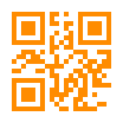

In [5]:
# OTP를 QR 코드 데이터로 변환하여 QR 코드 생성
def generate_qr_code(data):
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size=10,
        border=1,
    )
    
    qr.add_data(data)
    qr.make(fit=True)
    
    img = qr.make_image(fill_color="darkorange", back_color="white")
    img.save("safe_phone_qr_code.png")
    
generate_qr_code(safe_phone)

img = Image.open('safe_phone_qr_code.png')
plt.figure(figsize=(2, 2))
plt.imshow(img)
plt.grid(False)
plt.axis('off')
print("QR코드가 생성되었습니다.")
plt.show()

In [ ]:
THE END!